# Projet Deep Learning Exercice2 Kévin CORTIAL et William GIRALDO

## Librairie utilisées

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import time

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer

Using TensorFlow backend.


## Importation des bases de données

In [2]:
data = pd.read_csv("C:/Users/CORTIAL/Documents/Universite/M2/Deep_learning/dm/simulations.csv", header=None, delimiter=',')

In [3]:
X = data.iloc[:,8:16]
X

,8,9,10,11,12,13,14,15
0,0.134850,0.095695,52.411846,46.665506,0.456857,0.498308,0.462544,0.569043
1,0.174525,0.118662,55.276823,47.986155,0.467475,0.473695,0.324767,0.457710
2,0.130938,0.087290,57.602196,49.147401,0.583165,0.383176,0.428328,0.528848
3,0.135862,0.076790,63.949029,53.460064,0.724916,0.255798,0.386492,0.497157
4,0.116687,0.083390,54.182646,47.427364,0.483154,0.483668,0.515468,0.622133
...,...,...,...,...,...,...,...,...
9995,0.191387,0.133257,54.748808,47.904946,0.376072,0.539880,0.329150,0.478433
9996,0.194837,0.129781,56.075191,48.558083,0.453328,0.475563,0.269954,0.413738
9997,0.111100,0.069681,59.996400,50.625436,0.753639,0.231736,0.462265,0.544195
9998,0.140025,0.098967,53.189520,46.879180,0.455035,0.495934,0.446288,0.563200


In [4]:
Y = data.iloc[:,0:3]
Y

,0,1,2
0,0.120964,0.035158,0.618706
1,0.157933,0.077691,0.614342
2,0.104400,0.064752,0.526321
3,0.081305,0.104735,0.351984
4,0.082942,0.032711,0.634617
...,...,...,...
9995,0.149131,0.082215,0.741594
9996,0.162341,0.099584,0.632764
9997,0.128866,0.065609,0.285652
9998,0.127049,0.041564,0.619351


L'ensemble des données comprend 10 000 données. A partir des 8 variables de la base de données X, nous cherchons à prédire 3 variables réelles qui sont dans la base de données Y.

On décompose aléatoirement les données en 8000 individus pour l’ensemble d’apprentissage et 2000 données pour tester notre modèle.

In [5]:
#Séparation de 10 000 individus en un dataset train de 8 000 lignes et un dataset test de 2 000 lignes

X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(Y), test_size=0.2)

## Construction du modèle

Afin de construire notre réseau de neurones, nous avons tout d'abord choisit les paramètres suivants :
- Une initialisation des poids initiaux 'uniform' entre -0.05 et 0.05.
- Une fonction d'activation 'relu' pour les couches cachées.
- Une fonction d'activation 'linear' pour la sortie du réseau, comme il est demandé dans l'énoncé.
- l’algorithme 'adam' qui est généralement le plus pertinent pour la descente du gradient.
- la fonction de perte logarithmique 'mean_absolute_percentage_error'
- Nous mesurons les performances de notre réseau en calculant MAPE

Ces paramètres pourront être modifiés dans la suite du notebook

Afin de déterminer la profondeur optimale de notre réseau, nous avons testé "à la main" les performances des modèles ayant (1, 2, ..., 5) couches cachées avec un nombre de neurone arbitraires. En comparant les MAPE des 5 modèles, nous remarquons que le modèle avec 2 couches cachées est celui qui obtient le meilleur score.

Par la suite, nous avons souhaité déterminer la combinaison optimale du nombre de neurones dans le réseau. Pour cela, dans une boucle for, nous avons fait varier le nombre de neuronnes des 2 couches "i" et "j" entre 10 et 30. 10 étant pour nous le minimum puisque nous avons 8 variables en entrée du modèle. Et 30 car nous ne souhaitions pas avoir un modèle trop complexe pour l'hyperparamétrisation à la fin du notebook. En comparant les MAPE des (20*20 = 400) modèles, le réseau qui avait le meilleur MAPE était celui avec 25 neurones dans la première couche et 20 dans la deuxième couche cachée.

In [6]:
model = Sequential() #Initialisation modèle

model.add(Dense(25, input_dim=8, 
                kernel_initializer='uniform', 
                activation='relu'))

#deuxième couche : 20 neurones
model.add(Dense(20, kernel_initializer='uniform', 
                activation='relu'))

model.add(Dense(3, kernel_initializer='uniform', activation='linear'))

model.compile(loss='mean_absolute_percentage_error', 
              optimizer='adam', 
              metrics = ['mape']) #une ou plrs fonction pour évaluer le modèle)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                225       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 63        
Total params: 808
Trainable params: 808
Non-trainable params: 0
_________________________________________________________________


In [7]:
evolution = model.fit(X_train, y_train,
         batch_size=10,
         epochs=250,
         verbose=2,
         validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/250
 - 5s - loss: 45.0591 - mape: 45.0591 - val_loss: 34.0547 - val_mape: 34.0547
Epoch 2/250
 - 2s - loss: 28.5152 - mape: 28.5152 - val_loss: 21.4015 - val_mape: 21.4015
Epoch 3/250
 - 2s - loss: 21.1828 - mape: 21.1828 - val_loss: 23.1679 - val_mape: 23.1679
Epoch 4/250
 - 2s - loss: 19.6820 - mape: 19.6820 - val_loss: 19.1047 - val_mape: 19.1047
Epoch 5/250
 - 1s - loss: 19.0013 - mape: 19.0013 - val_loss: 18.3261 - val_mape: 18.3261
Epoch 6/250
 - 2s - loss: 18.4769 - mape: 18.4770 - val_loss: 18.7101 - val_mape: 18.7101
Epoch 7/250
 - 1s - loss: 17.7037 - mape: 17.7037 - val_loss: 15.6826 - val_mape: 15.6826
Epoch 8/250
 - 1s - loss: 15.6322 - mape: 15.6322 - val_loss: 13.3128 - val_mape: 13.3128
Epoch 9/250
 - 1s - loss: 13.4546 - mape: 13.4546 - val_loss: 11.4603 - val_mape: 11.4603
Epoch 10/250
 - 1s - loss: 11.1107 - mape: 11.1107 - val_loss: 9.0701 - val_mape: 9.0701
Epoch 11/250
 - 2s - loss: 9.9161 - mape: 9.9161 - va

Epoch 95/250
 - 2s - loss: 5.5472 - mape: 5.5472 - val_loss: 6.4023 - val_mape: 6.4023
Epoch 96/250
 - 1s - loss: 5.6024 - mape: 5.6024 - val_loss: 8.5898 - val_mape: 8.5898
Epoch 97/250
 - 2s - loss: 5.6087 - mape: 5.6087 - val_loss: 6.1055 - val_mape: 6.1055
Epoch 98/250
 - 1s - loss: 5.6307 - mape: 5.6306 - val_loss: 5.3920 - val_mape: 5.3920
Epoch 99/250
 - 1s - loss: 5.4610 - mape: 5.4610 - val_loss: 5.2872 - val_mape: 5.2872
Epoch 100/250
 - 2s - loss: 5.6020 - mape: 5.6020 - val_loss: 4.9734 - val_mape: 4.9734
Epoch 101/250
 - 2s - loss: 5.4414 - mape: 5.4414 - val_loss: 4.4300 - val_mape: 4.4300
Epoch 102/250
 - 2s - loss: 5.6100 - mape: 5.6100 - val_loss: 5.4707 - val_mape: 5.4707
Epoch 103/250
 - 2s - loss: 5.4880 - mape: 5.4880 - val_loss: 4.8663 - val_mape: 4.8663
Epoch 104/250
 - 1s - loss: 5.5098 - mape: 5.5098 - val_loss: 4.8456 - val_mape: 4.8456
Epoch 105/250
 - 2s - loss: 5.5278 - mape: 5.5278 - val_loss: 7.4978 - val_mape: 7.4978
Epoch 106/250
 - 2s - loss: 5.4457 - 

 - 2s - loss: 4.9679 - mape: 4.9679 - val_loss: 4.5103 - val_mape: 4.5103
Epoch 189/250
 - 2s - loss: 4.6290 - mape: 4.6290 - val_loss: 5.2227 - val_mape: 5.2227
Epoch 190/250
 - 2s - loss: 4.8212 - mape: 4.8212 - val_loss: 4.9717 - val_mape: 4.9717
Epoch 191/250
 - 2s - loss: 4.7470 - mape: 4.7470 - val_loss: 3.5515 - val_mape: 3.5515
Epoch 192/250
 - 2s - loss: 4.6959 - mape: 4.6959 - val_loss: 4.7777 - val_mape: 4.7777
Epoch 193/250
 - 2s - loss: 4.7325 - mape: 4.7325 - val_loss: 4.7881 - val_mape: 4.7881
Epoch 194/250
 - 2s - loss: 4.7582 - mape: 4.7582 - val_loss: 4.4244 - val_mape: 4.4244
Epoch 195/250
 - 2s - loss: 4.7459 - mape: 4.7459 - val_loss: 3.5433 - val_mape: 3.5433
Epoch 196/250
 - 1s - loss: 4.6891 - mape: 4.6891 - val_loss: 6.3820 - val_mape: 6.3820
Epoch 197/250
 - 2s - loss: 4.6426 - mape: 4.6426 - val_loss: 5.2537 - val_mape: 5.2537
Epoch 198/250
 - 2s - loss: 4.8198 - mape: 4.8198 - val_loss: 4.1521 - val_mape: 4.1521
Epoch 199/250
 - 2s - loss: 4.6839 - mape: 4.6

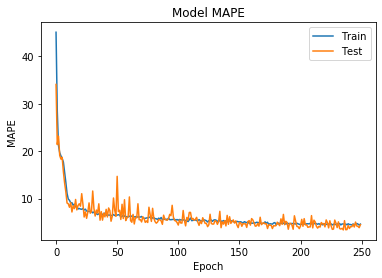

In [8]:
plt.plot(evolution.history['mape'])
plt.plot(evolution.history['val_mape'])
plt.title("Model MAPE")
plt.legend(["Train", "Test"])
plt.ylabel("MAPE")
plt.xlabel("Epoch")
plt.show()

In [9]:
model.evaluate(X_test, y_test)[1]

2000/2000 [==============================] - 0s 107us/step


4.504660129547119

**Sans optimisation des paramètres, notre réseau de neurones prédit les 3 bonnes valeurs de sortie avec une erreur MAPE de 4.5 environ**

# Hyper Paramétrisation

Après avoir déterminé la profondeur optimale du réseau, nous souhaitons maintenant trouver les paramètres optimaux du modèle. Pour cela, nous utilisons la fonction GridSearchCV. 
Cette fonction n'admet pas MAPE comme score pour retenir le meilleur modèle. Nous avons donc essayé d'implémenter nous même la fonction "mean_absolute_percentage_error" dans la fonction GridSearchCV par l'intermédiaire de la variable my_scorer.

In [6]:
# Function MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

my_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

Nous définissons notre modèle dans une fonction "create_model" en faisant varier certains paramètres tels que :
- l'initialisation des poids "init_mode".
- l’algorithme d'optimisation pour la descente du gradient "optimizer".

In [14]:
def create_model(init_mode='uniform', optimizer='adam'):
    # define model
    model = Sequential()
    model.add(Dense(25, input_dim=8, 
                kernel_initializer=init_mode, 
                activation='relu')) 

    model.add(Dense(20, kernel_initializer=init_mode, 
                activation='relu'))
    
    model.add(Dense(3, kernel_initializer=init_mode, activation='linear'))
    
    # compile model
    model.compile(loss='mean_absolute_percentage_error', 
              optimizer=optimizer, 
              metrics = ['mape']) #une ou plrs fonction pour évaluer le modèle
    return model

Afin de pourvoir utiliser notre modèle keras dans la fonction GridSearchCV de sklearn, nous devons utiliser la fonction KerasRegressor (ou KerasClassifier pour de la classification). Cette fonction nous permet de mettre les paramètres d'entrainement du réseau afin qu'il soit utilisé dans GridSearchCV.

Enfin, nous avons sélectionné sélectionner la liste des paramètres que nous souhaitons tester dans la variable "param_grid". Dans ce code avons laissé seulement 2 possibilités par variables pour réduire le temps de calcul. Mais dans la réalité, nous avons testé avec tous les paramètres possibles, et nous avons laissé les paramètres ayant eu les meilleurs résultats : c'est à dire :

init_mode = ['uniform', 'normal']  et   optimizer = ['Adam', 'Adamax']

La fonction gridSearchCV test toutes les combinaisons possible des paramètres en réalisant 3 cross validation.

In [15]:
model_CV = KerasRegressor(build_fn=create_model, epochs=200, 
                           batch_size=10, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'normal']
optimizer = ['Adam', 'Adamax']
param_grid = dict(init_mode=init_mode, optimizer=optimizer)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3, scoring=my_scorer, verbose=1)
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 23.6min finished


Epoch 1/200
8000/8000 [==============================] - 3s 377us/step - loss: 46.1182 - mape: 46.1182
Epoch 2/200
8000/8000 [==============================] - 2s 228us/step - loss: 29.9570 - mape: 29.9570
Epoch 3/200
8000/8000 [==============================] - 2s 253us/step - loss: 21.7245 - mape: 21.7245
Epoch 4/200
8000/8000 [==============================] - 2s 255us/step - loss: 19.9643 - mape: 19.9643
Epoch 5/200
8000/8000 [==============================] - 2s 200us/step - loss: 17.2448 - mape: 17.2448
Epoch 6/200
8000/8000 [==============================] - 2s 215us/step - loss: 13.2764 - mape: 13.2764
Epoch 7/200
8000/8000 [==============================] - 2s 279us/step - loss: 11.6744 - mape: 11.6744
Epoch 8/200
8000/8000 [==============================] - 2s 269us/step - loss: 10.6433 - mape: 10.6433
Epoch 9/200
8000/8000 [==============================] - 2s 207us/step - loss: 10.2747 - mape: 10.2747
Epoch 10/200
8000/8000 [==============================] - 2s 225us/step -

8000/8000 [==============================] - 2s 219us/step - loss: 4.2417 - mape: 4.2417
Epoch 160/200
8000/8000 [==============================] - 2s 237us/step - loss: 4.0332 - mape: 4.0332
Epoch 161/200
8000/8000 [==============================] - 2s 235us/step - loss: 4.2046 - mape: 4.2046
Epoch 162/200
8000/8000 [==============================] - 2s 217us/step - loss: 4.1210 - mape: 4.1210
Epoch 163/200
8000/8000 [==============================] - 2s 199us/step - loss: 4.2348 - mape: 4.2348
Epoch 164/200
8000/8000 [==============================] - 2s 204us/step - loss: 4.2540 - mape: 4.2540
Epoch 165/200
8000/8000 [==============================] - 2s 232us/step - loss: 4.3252 - mape: 4.3252
Epoch 166/200
8000/8000 [==============================] - 2s 241us/step - loss: 4.3262 - mape: 4.3262
Epoch 167/200
8000/8000 [==============================] - 2s 234us/step - loss: 4.2611 - mape: 4.2611
Epoch 168/200
8000/8000 [==============================] - 2s 245us/step - loss: 4.2408

In [16]:
print(f'Best Mape for {np.abs(grid_result.best_score_)} using {grid_result.best_params_}')
means = np.abs(grid_result.cv_results_['mean_test_score'])
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Best Mape for 4.6358727711382155 using {'init_mode': 'normal', 'optimizer': 'Adamax'}
 mean=4.796, std=0.6638 using {'init_mode': 'uniform', 'optimizer': 'Adam'}
 mean=4.72, std=1.517 using {'init_mode': 'uniform', 'optimizer': 'Adamax'}
 mean=5.54, std=1.46 using {'init_mode': 'normal', 'optimizer': 'Adam'}
 mean=4.636, std=0.6293 using {'init_mode': 'normal', 'optimizer': 'Adamax'}


Les meilleurs résultats de MAPE sont donc obtenus lorsque nous avons une initialisation "normal" et un optimizer "Adamax" même si nous remarquons que tous les résultats sont très similaires / proches.

Nous allons vérifier le nombre de neurones opital lorsque l'initialisation est "normal" et l'optimizer est "Adamax".

In [7]:
def create_model(neurons1 = 20, neurons2=20):
    # define model
    model = Sequential()
    model.add(Dense(neurons1, input_dim=8, 
                kernel_initializer='normal', 
                activation='relu')) 

    model.add(Dense(neurons2, kernel_initializer='normal', 
                activation='relu'))
    
    model.add(Dense(3, kernel_initializer='normal', activation='linear'))
    
    # compile model
    model.compile(loss='mean_absolute_percentage_error', 
              optimizer='Adamax', 
              metrics = ['mape']) #une ou plrs fonction pour évaluer le modèle
    return model

In [8]:
model_CV = KerasRegressor(build_fn=create_model, epochs=200, 
                           batch_size=100, verbose=1)
# define the grid search parameters
neurons1 = [20,21,22,23,24,25,26,27,28,29,30]
neurons2 = [20,21,22,23,24,25,26,27,28,29,30]
param_grid = dict(neurons1 = neurons1, neurons2 = neurons2 )
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3, scoring=my_scorer, verbose=1)
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 121 candidates, totalling 363 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.3min
C:\Users\CORTIAL\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 363 out of 363 | elapsed: 80.6min finished


Epoch 1/200
8000/8000 [==============================] - 2s 302us/step - loss: 51.6353 - mape: 51.6353
Epoch 2/200
8000/8000 [==============================] - 0s 25us/step - loss: 45.7619 - mape: 45.7619
Epoch 3/200
8000/8000 [==============================] - 0s 29us/step - loss: 44.7819 - mape: 44.7819
Epoch 4/200
8000/8000 [==============================] - 0s 32us/step - loss: 43.5833 - mape: 43.5833
Epoch 5/200
8000/8000 [==============================] - 0s 23us/step - loss: 42.1041 - mape: 42.1041
Epoch 6/200
8000/8000 [==============================] - 0s 25us/step - loss: 40.2075 - mape: 40.2075
Epoch 7/200
8000/8000 [==============================] - 0s 25us/step - loss: 37.7857 - mape: 37.7857
Epoch 8/200
8000/8000 [==============================] - 0s 25us/step - loss: 34.6818 - mape: 34.6818
Epoch 9/200
8000/8000 [==============================] - 0s 30us/step - loss: 30.9929 - mape: 30.9929
Epoch 10/200
8000/8000 [==============================] - 0s 28us/step - loss: 27

8000/8000 [==============================] - 0s 26us/step - loss: 5.4115 - mape: 5.4115
Epoch 161/200
8000/8000 [==============================] - 0s 25us/step - loss: 4.8773 - mape: 4.8773
Epoch 162/200
8000/8000 [==============================] - 0s 23us/step - loss: 4.8432 - mape: 4.8432
Epoch 163/200
8000/8000 [==============================] - 0s 24us/step - loss: 5.3704 - mape: 5.3704
Epoch 164/200
8000/8000 [==============================] - 0s 23us/step - loss: 4.9040 - mape: 4.9040
Epoch 165/200
8000/8000 [==============================] - 0s 23us/step - loss: 5.1132 - mape: 5.1132
Epoch 166/200
8000/8000 [==============================] - 0s 22us/step - loss: 4.9523 - mape: 4.9523
Epoch 167/200
8000/8000 [==============================] - 0s 24us/step - loss: 4.9848 - mape: 4.9848 0s - loss: 4.9590 - mape: 
Epoch 168/200
8000/8000 [==============================] - 0s 29us/step - loss: 5.1037 - mape: 5.1037
Epoch 169/200
8000/8000 [==============================] - 0s 31us/st

In [9]:
print(f'Best Mape for {np.abs(grid_result.best_score_)} using {grid_result.best_params_}')
means = np.abs(grid_result.cv_results_['mean_test_score'])
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Best Mape for 4.679410720843589 using {'neurons1': 28, 'neurons2': 25}
 mean=6.62, std=0.9664 using {'neurons1': 20, 'neurons2': 20}
 mean=7.365, std=0.3846 using {'neurons1': 20, 'neurons2': 21}
 mean=5.963, std=0.9705 using {'neurons1': 20, 'neurons2': 22}
 mean=6.395, std=1.3 using {'neurons1': 20, 'neurons2': 23}
 mean=5.327, std=0.8917 using {'neurons1': 20, 'neurons2': 24}
 mean=5.699, std=0.906 using {'neurons1': 20, 'neurons2': 25}
 mean=6.384, std=1.416 using {'neurons1': 20, 'neurons2': 26}
 mean=6.336, std=0.5294 using {'neurons1': 20, 'neurons2': 27}
 mean=5.531, std=0.7719 using {'neurons1': 20, 'neurons2': 28}
 mean=8.166, std=0.7415 using {'neurons1': 20, 'neurons2': 29}
 mean=5.448, std=0.4553 using {'neurons1': 20, 'neurons2': 30}
 mean=6.081, std=0.3213 using {'neurons1': 21, 'neurons2': 20}
 mean=6.369, std=1.079 using {'neurons1': 21, 'neurons2': 21}
 mean=5.347, std=0.6403 using {'neurons1': 21, 'neurons2': 22}
 mean=5.94, std=0.2089 using {'neurons1': 21, 'neurons

Ainsi, le nombre de neurone optimal serait 28 neurones dans la première couche et 25 dans la deuxième.

Nous pouvons donc implémenter notre modèle final "model_F" avec les paramètres sélectionnés.

In [24]:
model_F = Sequential() #Initialisation modèle

model_F.add(Dense(28, input_dim=8, 
                kernel_initializer='normal', 
                activation='relu'))

#deuxième couche : 20 neurones
model_F.add(Dense(25, kernel_initializer='normal', 
                activation='relu'))

model_F.add(Dense(3, kernel_initializer='normal', activation='linear'))

model_F.compile(loss='mean_absolute_percentage_error', 
              optimizer='Adamax', 
              metrics = ['mape']) #une ou plrs fonction pour évaluer le modèle)

model_F.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 28)                252       
_________________________________________________________________
dense_17 (Dense)             (None, 25)                725       
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 78        
Total params: 1,055
Trainable params: 1,055
Non-trainable params: 0
_________________________________________________________________


In [25]:
evolution2 = model_F.fit(X_train, y_train,
         batch_size=10,
         epochs=250,
         verbose=2,
         validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/250
 - 2s - loss: 42.8992 - mape: 42.8992 - val_loss: 33.5448 - val_mape: 33.5448
Epoch 2/250
 - 1s - loss: 28.4444 - mape: 28.4444 - val_loss: 20.7740 - val_mape: 20.7740
Epoch 3/250
 - 1s - loss: 21.1954 - mape: 21.1954 - val_loss: 17.8944 - val_mape: 17.8944
Epoch 4/250
 - 1s - loss: 19.5535 - mape: 19.5535 - val_loss: 17.5010 - val_mape: 17.5010
Epoch 5/250
 - 1s - loss: 17.8398 - mape: 17.8398 - val_loss: 16.0137 - val_mape: 16.0137
Epoch 6/250
 - 2s - loss: 14.4521 - mape: 14.4521 - val_loss: 12.5696 - val_mape: 12.5696
Epoch 7/250
 - 1s - loss: 11.0918 - mape: 11.0918 - val_loss: 10.6879 - val_mape: 10.6879
Epoch 8/250
 - 2s - loss: 10.2301 - mape: 10.2301 - val_loss: 7.8584 - val_mape: 7.8584
Epoch 9/250
 - 2s - loss: 9.8826 - mape: 9.8826 - val_loss: 10.6545 - val_mape: 10.6545
Epoch 10/250
 - 2s - loss: 9.2098 - mape: 9.2098 - val_loss: 8.1672 - val_mape: 8.1672
Epoch 11/250
 - 1s - loss: 9.2365 - mape: 9.2365 - val_loss

Epoch 95/250
 - 1s - loss: 4.4682 - mape: 4.4682 - val_loss: 6.1066 - val_mape: 6.1066
Epoch 96/250
 - 2s - loss: 4.5064 - mape: 4.5064 - val_loss: 4.5035 - val_mape: 4.5035
Epoch 97/250
 - 2s - loss: 4.4700 - mape: 4.4700 - val_loss: 4.0197 - val_mape: 4.0197
Epoch 98/250
 - 2s - loss: 4.5064 - mape: 4.5064 - val_loss: 7.0230 - val_mape: 7.0230
Epoch 99/250
 - 1s - loss: 4.5688 - mape: 4.5688 - val_loss: 3.9110 - val_mape: 3.9110
Epoch 100/250
 - 1s - loss: 4.8550 - mape: 4.8550 - val_loss: 4.3769 - val_mape: 4.3769
Epoch 101/250
 - 1s - loss: 4.3914 - mape: 4.3914 - val_loss: 4.2077 - val_mape: 4.2077
Epoch 102/250
 - 2s - loss: 4.5850 - mape: 4.5850 - val_loss: 5.2569 - val_mape: 5.2569
Epoch 103/250
 - 2s - loss: 4.4709 - mape: 4.4709 - val_loss: 4.3804 - val_mape: 4.3804
Epoch 104/250
 - 1s - loss: 4.5677 - mape: 4.5677 - val_loss: 3.6470 - val_mape: 3.6470
Epoch 105/250
 - 1s - loss: 4.5245 - mape: 4.5245 - val_loss: 4.8036 - val_mape: 4.8036
Epoch 106/250
 - 1s - loss: 4.4946 - 

 - 1s - loss: 3.9783 - mape: 3.9783 - val_loss: 3.6965 - val_mape: 3.6965
Epoch 189/250
 - 2s - loss: 3.9388 - mape: 3.9388 - val_loss: 3.2615 - val_mape: 3.2615
Epoch 190/250
 - 1s - loss: 4.0497 - mape: 4.0497 - val_loss: 3.8644 - val_mape: 3.8644
Epoch 191/250
 - 1s - loss: 3.7496 - mape: 3.7496 - val_loss: 2.9769 - val_mape: 2.9769
Epoch 192/250
 - 1s - loss: 3.9213 - mape: 3.9213 - val_loss: 5.2564 - val_mape: 5.2564
Epoch 193/250
 - 1s - loss: 3.9353 - mape: 3.9353 - val_loss: 3.1717 - val_mape: 3.1717
Epoch 194/250
 - 1s - loss: 3.9847 - mape: 3.9847 - val_loss: 2.8882 - val_mape: 2.8882
Epoch 195/250
 - 2s - loss: 4.0087 - mape: 4.0087 - val_loss: 3.6313 - val_mape: 3.6313
Epoch 196/250
 - 2s - loss: 3.7954 - mape: 3.7954 - val_loss: 7.4562 - val_mape: 7.4562
Epoch 197/250
 - 2s - loss: 3.8382 - mape: 3.8382 - val_loss: 3.4147 - val_mape: 3.4147
Epoch 198/250
 - 2s - loss: 3.8621 - mape: 3.8621 - val_loss: 2.5276 - val_mape: 2.5276
Epoch 199/250
 - 2s - loss: 3.9649 - mape: 3.9

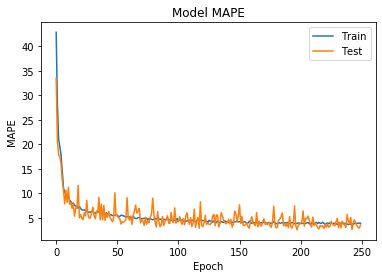

In [26]:
plt.plot(evolution2.history['mape'])
plt.plot(evolution2.history['val_mape'])
plt.title("Model MAPE")
plt.legend(["Train", "Test"])
plt.ylabel("MAPE")
plt.xlabel("Epoch")
plt.show()

In [27]:
model_F.evaluate(X_test, y_test)[1]

2000/2000 [==============================] - 0s 43us/step


3.5218935012817383

Nous remarquons sur la sortie graphique que les résultats de MAPE sur les données de test fluent beaucoup. Cepandant, ils restent toujours inférieur à 10 et sont très souvent proches de la valeur 3.5 en MAPE.

**Ainsi, notre modèle le plus performant est à 3.52 de MAPE"